# Ajuster un modèle aux données

Nous avons vu jusqu'ici plusieurs exemples de modèles en physique, et leur représentation numérique. Ces modèles sont construits pour représenter des données expérimentales ou des observations.

Les modèles dépendent d'un certain nombre de paramètres qu'il faut choisir afin de représenter au mieux les données. Une méthode possible est d'utiliser les données expérimentales ou les observations afin de trouver le meilleur jeu de paramètres qui les représente à l'aide d'un modèle donné. On dit que l'on fait un **ajustement du modèle aux données**. En anglais on appelle cela un ***fit***, terme qui est souvent repris par les physiciens, même en français.

Une méthode pour trouver le meilleur ajustement d'un modèle aux données est la méthode des moindres carrés, ce que nous allons voir ici.

## Paramètres d'un modèle

Reprenons le modèle de l'accéleration constante vu dans la séquence sur la démarche de modélisation. Nous avons mesuré la vitesse $v_i$ d'un objet pour des temps $t_i$. L'objet est lâché avec une vitesse initiale vers le bas d'environ 1,6 m/s. Voici le résultat des mesures :

|$i$|0|1|2|3|4|5|6|7|8|9|10|
|--|--|--|--|--|--|--|--|--|--|--|--|
|$t_i$|0.0|0.1|0.2|0.3|0.4|0.5|0.6|0.7|0.8|0.9|1.0|
|$v_i$|0.338|   -1.509|  -5.301|  -4.404|  -6.967|  -6.229|  -5.279|  -9.266|  -8.847| -11.260| -12.040|

Le modèle est :

$$
v(t;v_0,g) = v_0 - gt
$$

Nous déclarons que $v_0$ et $g$ sont les paramètres du modèle. Il est d'usage en physique de noter les paramètres après un point-virgule dans la fonction : $v(t;v_0,g)$, pour les distinguer de la variable libre $t$.

Nous supposons que les paramètres du modèle, $v_0$ et $g$, ne sont pas connus *a priori*. Nous allons utiliser les données expérimentales pour trouver les meilleures valeurs possibles des paramètres, d'après ces données.

Représentons graphiquement les données et le modèle :

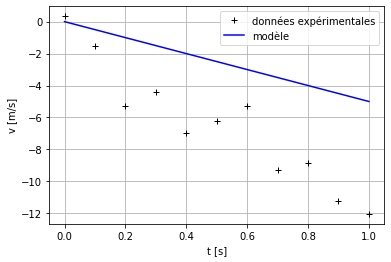

In [1]:
# Importation des modules
import numpy as np
import matplotlib.pyplot as plt

# Données experimentales
Nexp = 11
t_exp = np.linspace(0, 1, Nexp)
v_exp = np.array([0.338, -1.509, -5.301, -4.404, -6.967, -6.229, -5.279, -9.266, -8.847, -11.260, -12.040])

# Paramètres du modèle
g = 5
v0 = 0

# Discrétisation du modèle
Nmod = 100
t_mod = np.linspace(0, 1, Nmod)
v_mod = v0 - g * t_mod

# Représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.legend()
plt.show()

### Exercice
Ajuster la valeur des paramètres $v_0$ et $g$ *à la main*, c'est-à-dire en changeant directement leur valeur dans le script ci-dessus, afin que le modèle représente au mieux les données.

Quel est le critère qui vous permet de dire que le modèle représente mieux les données ?

##  La méthode des moindres-carrés

La méthode des moindres carrés permet d'utiliser un critère quantitatif afin de trouver le meilleur ajustement d'un modèle d'après des données expérimentales. Calculons la somme quadratique des écarts entre le modèle et les données du problème : 

$$
S = \sum_{i=0}^{N-1} (y_i - P(x_i))^2 
$$

Les couples $(x_i,y_i)$ sont les données expérimentales, alors que $y=P(x)$ est le modèle. Le but pour trouver le modèle le mieux ajusté aux données expérimentales est de minimiser la somme $S$. On minimise les carrés des écarts, d'où le nom de la méthode des « moindres carrés ».

Si on applique cela au problème de l'accélération constante, on a :

$$
S(v_0,g) = \sum_{i=0}^{N-1} (v_i - (v_0 - g t_i))^2 
$$

$S$ est une fonction des paramètres du problème, qui doit avoir un minimum pour le meilleur ajustement du modèle aux données (*best fit* en anglais).

Représentons graphiquement cette somme :

[ 0.  -0.5 -1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5. ]


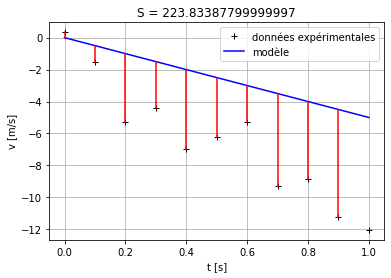

In [4]:
# Paramètres du modèle
g = 5
v0 = 0

# Discrétisation du modèle pour les points expérimentaux
t_mod = np.linspace(0, 1, Nexp)
v_mod = v0 - g * t_exp
print(v_mod)

# Calcul de la somme S
Si = (v_exp - v_mod) ** 2
S = np.sum(Si)

# Représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')

# représentation des écarts entre le modèle et les données
for i in range(Nexp - 1):
    plt.plot((t_exp[i], t_exp[i]), (v_exp[i], v_mod[i]), '-r')

plt.title('S = ' + str(S))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.legend()
plt.show()

### Exercice
Dans la cellule ci-dessus, calculer $S$ pour les paramètres trouvés à l'exercice précedent. Pouvez-vous améliorer la valeur des paramètres en vous basant sur la valeur de $S$ ?

Pourquoi les éléments de la somme des écarts entre les données et le modèle sont-ils mis au carré ?

## Régression linéaire
Pour un modèle linéaire tel que celui de l'accélération constante, il est possible de trouver le minimum de la fonction $S$ de façon analytique.

Le modèle linéaire est de la forme $P(x; a, b) = a + b x$. La somme $S$ s'écrit alors

$$
S(a,b) = \sum_{i=0}^{N-1} [y_i - (a + b x_i)]^2
$$

Le polynôme $S$ obtenu est du second degré en $a$ et $b$. Il peut s'écrire

$$
S(a,b) = b^2 \sum_{i=0}^{N-1} x_i^2 + 2 a b \sum_{i=0}^{N-1} x_i + N a^2 - 2 b \sum_{i=0}^{N-1} x_i y_i - 2 a \sum_{i=0}^{N-1} y_i + \sum_{i=0}^{N-1} y_i^2
$$

Une condition nécessaire pour que $S$ ait un minimum en $(a_m,b_m)$ est que le gradient de $S$ s'annule au point $(a_m,b_m)$ :

$$
\frac{\partial S}{\partial a} (a_m,b_m)  =  0 \;\;\;\; \Rightarrow \;\;\;\; N a_m + b_m \sum_{i=0}^{N-1} x_i = \sum_{i=0}^{N-1} y_i
$$
$$
\frac{\partial S}{\partial b} (a_m,b_m)  =  0 \;\;\;\; \Rightarrow \;\;\;\; a_m \sum_{i=0}^{N-1} x_i + b_m \sum_{i=0}^{N-1} x_i^2 = \sum_{i=0}^{N-1} x_i y_i
$$

On obtient alors :

$$
a_m = \bar{y}-b_m \bar{x}
$$
$$
b_m = \frac{\mathrm{cov}(x,y)}{\mathrm{var}(x)}
$$


où

$$
             \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_{i} 
$$
$$
             \bar{y} = \frac{1}{N} \sum_{i=0}^{N-1} y_{i} 
$$
$$
             \mathrm{cov}(x,y) = \frac{1}{N} \sum_{i=0}^{N-1} (x_{i} - \bar{x}) (y_{i} - \bar{y_i}) = \left( \frac{1}{N} \sum_{i=0}^{N-1} x_{i} y_{i} \right) - \bar{x}\bar{y} 
$$
$$
             \mathrm{var}(x) = \frac{1}{N} \sum_{i=0}^{N-1} (x_{i} - \bar{x})^2 = \left( \frac{1}{N} \sum_{i=0}^{N-1} x_{i}^2 \right) - \bar{x}^2
$$

La fonction suivante renvoie les paramètres $a$ et $b$ de la régression linéaire pour un jeu de données expérimentales :

In [5]:
# Fonction régression linéaire
def reglin(xi, yi):
    '''
        Calcule les paramètres a et b du meilleur ajustement d'un modèle linéaire
        y = a + bx sur un jeu de données (xi, yi)
    '''
    N = np.size(xi)
    
    xm = np.mean(xi)
    ym = np.mean(yi)
    cov = 1 / N * np.sum(xi * yi) - xm * ym
    var = 1 / N * np.sum(xi ** 2) - xm ** 2
    
    b = cov / var
    a = ym - b * xm
    
    return (a, b)

### Exercice
1. Faire une régression linéaire sur les données temps, vitesse : $(t_{\mathrm{exp}},v_{\mathrm{exp}})$ en utilisant la fonction `reglin()`.
2. Comparer le résultat obtenu avec les valeurs des paramètres trouvés « à la main » dans l'exercice précédent.
3. Calculer $S$ et le comparer à celui obtenu à l'exercice précédent
3. Tracer les données et le modèle trouvé avec la régression linéaire

v0 = -1.00 m.s**-1
g = 10.87 m.s**-2


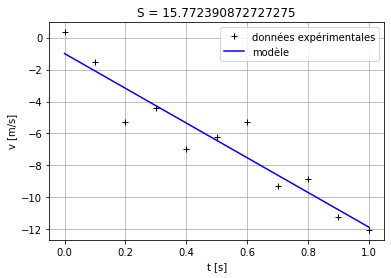

In [7]:
# Régression linéaire
a, b = reglin(t_exp, v_exp)

# Paramètre du modèle 
# y(x) = a + bx
# v(t) = v0 - gt
v0 = a
g = -b

# Affichage du résultat
print('v0 = {:4.2f} m.s**-1'.format(v0))
print('g = {:4.2f} m.s**-2'.format(g))

# Calcul du modèle pour les points expériementaux
t_mod = np.linspace(0, 1, Nexp)
v_mod = v0 - g * t_mod

# Calcul de la somme S
Si = (v_exp - (v0 - g * t_exp)) ** 2
S = np.sum(Si)

# Représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.title('S = ' + str(S))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.legend()
plt.show()

## La fonction `curve_fit`

La fonction `curve_fit` du module `optimize` de `scipy` permet d'ajuster n'importe quel modèle à des données expérimentales.

Voyons comment elle fonctionne avec les données de vitesse. Il faut d'abord définir la fonction python qui représente le modèle :

In [8]:
def modlin(x, a, b):
    '''
        Fonction qui représente le modèle linéaire
        y(x; a, b) = a + bx
    '''
    return a + b * x

<div class="alert alert-warning">

**Attention**

Dans la fonction python qui représente le modèle, il faut absolument que **la variable libre soit le premier argument** de la fonction. Suivent ensuite les paramètres du problème.
</div>

Nous importons ensuite la fonction `curve_fit` :

In [9]:
from scipy.optimize import curve_fit

Les arguments de la fonction `curve_fit` sont :

1. La fonction python qui représente le modèle
2. Le tableau qui représente les données $x_i$
3. Le tableau qui représente les données $y_i$

v0 = -1.00 m.s**-1
g = 10.87 m.s**-2


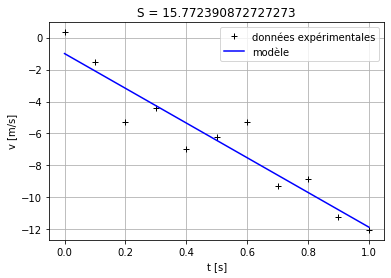

In [11]:
# Ajustement du modèle linéaire
solution = curve_fit(modlin, t_exp, v_exp, p0 = [0., 10.])

# Identification des paramètres du modèle
a, b = solution[0]
v0 = a
g = -b

# Affichage du résultat
print('v0 = {:4.2f} m.s**-1'.format(v0))
print('g = {:4.2f} m.s**-2'.format(g))

# Calcul du modèle pour les points expérimentaux
t_mod = np.linspace(0, 1, Nexp)
v_mod = modlin(t_mod, a, b)

# Calcul de la somme S
Si = (v_exp - v_mod) ** 2
S = np.sum(Si)

# Représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.title('S = ' + str(S))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.legend()
plt.show()

On voit que l'on obtient le même résultat qu'avec la régression linéaire. Ce ne sont pourtant pas les mêmes méthodes numériques qui sont employées. En augmentant le nombre de chiffres après la virgule utilisés pour afficher les paramètres trouvés avec chaque méthode, vous verrez que les résultats finissent par différer. On appelle cela la précision numérique de la méthode numérique. On le voit aussi sur les sommes $S$ qui sont différentes, certes pas de beaucoup !

<div class="alert alert-warning">

**Attention**

La fonction `curve_fit()` utilise des valeurs de départ par défaut égales à 1 pour tous les paramètres, avant d'ajuster ces valeurs grâce à un algorithme que l'on ne verra pas dans ce cours. Il arrive parfois que la fonction `curve_fit()` ne trouve pas de solution car les valeurs de départ des paramètres sont trop éloignées de la solution. Il faut alors utiliser l'option `p0` de la fonction `curve_fit()`, où il faut spécifier le tableau des valeurs de départ voulues, qui soient plus approchées de la solution. Afin de connaître une valeur approximative de la solution, on peut comme dans le tout 1er exercice ajuster à la main les paramètres.
</div>

### Exercice
Grâce à la fonction `curve_fit`, on peut facilement changer de modèle. Définir un modèle quadratique de la forme $y(x;a,b,c) = a + bx + cx^2$, et ajuster les paramètres sur les données de vitesse. Calculer la somme $S$ et représenter le modèle et les données.

v0 = -0.71 m.s**-1
g = 12.80 m.s**-2
c = 1.93 m.s**-3


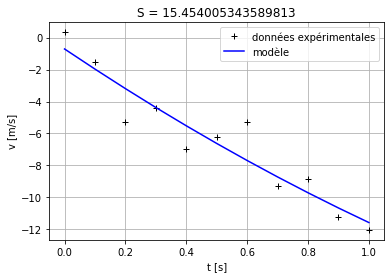

In [13]:
def modquad(x, a, b, c):
    '''
        Fonction qui représente le modèle quadratique
        y(x; a,b,c) = a + bx + cx**2
    '''
    return a + b * x + c * x ** 2

# Ajustement du modèle quadratique
solution = curve_fit(modquad, t_exp, v_exp)

# Paramètres du modèle
a, b, c = solution[0]
v0 = a
g = -b

# Affichage du résultat
print('v0 = {:4.2f} m.s**-1'.format(v0))
print('g = {:4.2f} m.s**-2'.format(g))
print('c = {:4.2f} m.s**-3'.format(c))

# Calcul du modèle pour les points expérimentaux
t_mod = np.linspace(0, 1, Nexp)
v_mod = modquad(t_mod, a, b, c)

# Calcul de la somme S
Si = (v_exp - v_mod) ** 2
S = np.sum(Si)

# Représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.title('S = ' + str(S))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.legend()
plt.show()

## Erreurs de mesures
Vous savez pour avoir déjà fait des expériences de physique en Travaux Pratiques, que l'on attache toujours une erreur estimée aux mesures expérimentales. Il est possible avec la fonction `errorbar()` de matplotlib d'afficher à la fois les mesures et leur barre d'erreur.

Dans notre exemple, on suppose que chaque mesure a la même erreur de mesure qui est de $\pm 2$ m.s $^{-1}$. On peut alors représenter les barres d'erreur avec l'option `yerr` (par défaut le 3ème argument) de la fonction `errorbar()`, qui est un tableau de même dimension que les données contenant les erreurs sur chaque point de mesure:

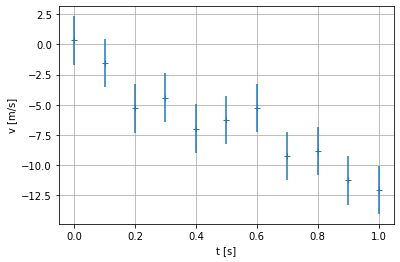

In [14]:
# définition du tableau des erreurs de mesure
erreurs = 2. * np.ones(v_exp.shape) # m/s


# Représentation graphique des données avec les barres d'erreur
plt.errorbar(t_exp, v_exp, yerr=erreurs, marker = '+', linestyle = '')

# Option du graphique
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()
plt.show()

## Erreurs sur les paramètres ajustés
Nous ne rentrerons pas dans les détails, mais la fonction `curve_fit()` permet d'estimer l'erreur sur les paramètres du modèle ajustés aux données grâce à la donnée des erreurs de mesure. Il faut alors spécifier les erreurs de mesure grâce à l'option `sigma` de la fonction `curve_fit()`, avec le tableau contenant les erreurs $\sigma_{y_i}$ sur chaque mesure. 

La somme quadratique des écarts entre le modèle et les données du problème est alors pondérée par les incertitudes de mesure :

$$
S = \sum_{i=0}^{N-1} \frac{(y_i - P(x_i))^2}{{\sigma_{y_i}}^2}
$$

Ainsi, les mesures avec une grande incertitude vont moins contribuer à la somme, et donc auront moins d'impact sur l'ajustement du modèle aux données.

On pourra remarquer qu'en plus du tableau contenant les paramètres ajustés, un deuxième tableau est retourné par la fonction `curve_fit()`. Il s'agit de la matrice de covariance de ces paramètres (que l'on notera `pcov` dans le code ci-dessous). On peut extraire de la matrice de covariance l'incertitude sur chacun des paramètres, donnée par la racine carrée des éléments diagonaux : `perr = np.sqrt(np.diag(pcov))`. 

Par exemple, estimons l'erreur sur les paramètres ajustés pour le modèle linéaire :

In [15]:
# Ajustement du modèle linéaire
solution, pcov = curve_fit(modlin, t_exp, v_exp, sigma = erreurs, absolute_sigma = True)

# Identification des paramètres du modèle
a, b = solution
v0 = a
g = -b

# Calcul de l'incertitude sur les paramètres ajustés
perr = np.sqrt(np.diag(pcov))

# Affichage
print('v0 = %5.3f \u00B1 %5.3f m/s' % (v0, perr[0]))
print('g = %5.3f \u00B1 %5.3f m/s' % (g, perr[1]))

v0 = -0.998 ± 1.128 m/s
g = 10.870 ± 1.907 m/s


<div class="alert alert-warning">

**Attention**

Par défaut la fonction `curve_fit` applique un facteur multiplicatif global sur les erreurs afin de normaliser la somme $S$, c'est-à-dire pour que $S=1$. Ainsi, par défaut, les erreurs n'ont pas un sens absolu mais seulement relatif entre elles. Afin d'obtenir l'erreur absolue, il faut mettre l'option `absolute_sigma = True` dans la fonction `curve_fit()`.
</div>